import the necessary libraries


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import xlsxwriter

import the required data

In [4]:
df = pd.read_excel("C:/Users/User/Desktop/Analysis-of-Georgian-Data/Vehicles-Statistic-Georgia/Data/Alienability Data/გასხვისება_2020.xlsx") 


write down how many columns and how many rows we want them to appear

In [5]:
pd.set_option('display.max_columns', None)   # number of Colums
pd.set_option('display.max_rows', 18)   # number of Rows

                                        Create functions to simplify the case in the future

Visualization

In [6]:
""" drawing with a percentage """

def Build_Barh_sizes( key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))

    


    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """

    ax.set_facecolor('xkcd:black')
    fig.patch.set_facecolor('xkcd:black')
    
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(alpha=0.2)
    ax.title.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """



    langs = key_Phrases   # add key_Phrases into new variable

    langs_users_num = np.array(Quantity)

    total = Filtered_data

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip( langs, percent )]   # percentage


    plt.barh(langs, langs_users_num)  # Chart
    plt.yticks( range(len(langs)), new_labels) # Ylabel 

    

    for spine in ax.spines.values():    # vertical lines   exist - clear
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # X-label,   numbers show-hide
    ax.tick_params(axis="y", left=False)
    

    plt.style.use(style)   # chart style

    plt.title(title)  # add title




    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=13)
    plt.rc('ytick', labelsize=13)

    # change the fontsize of axes title
    plt.rc('axes', titlesize=18)

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 10)
    ax.yaxis.set_tick_params(pad = 10)


    
    plt.show()


The most commonly used functions

In [7]:
def sort_Dictionary(Dictionary, reverse = False):        # Sorts by increase or decrease
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

In [8]:
def Quantity_key_Phrases_all(Dictinary , Increase_decrease):

    global key_Phrases      # We declare it a global variable so that other functions can see and use it
    
    sorted = sort_Dictionary (Dictinary , Increase_decrease)  # Sort by increase or decrease. Comes with what we point out

    key_Phrases = []    # We create a list to store phrases

    for i in sorted:
        key_Phrases.append(i)           # Add phrases to the list



In [9]:
def Show_first(Dictinary,show_first_item, Other_Show_Hide ):
    global key_Phrases      # We declare it a global variable so that other functions can see and use it
    global Quantity         # We declare it a global variable so that other functions can see and use it
    global Total            # We declare it a global variable so that other functions can see and use it
    

    Dictinary = sort_Dictionary(Dictinary , False)

    Total_Uncounted = []    # We create a list to store the actual quantity

    for i in Dictinary:
        Total_Uncounted.append(Dictinary[i])      # Add the actual quantity to the list

    Total = sum(Total_Uncounted)        # sum individual quantities to understand the total quantity




    sorted_items = Dictinary.items()  # We get individual members from dictionary 

    first_two = list(sorted_items)[(len(Dictinary)-show_first_item):len(Dictinary)]  # specify the amount of information we want to draw

    sorted = dict(first_two)        # return the list back to dictionary


    key_Phrases = []    # We create a list to store phrases
    Quantity = []       # We create a list to store the quantity of each

    
    for i in sorted:
        key_Phrases.append(i)           # Add phrases to the list
        Quantity.append(sorted[i])      # add the quantity of each in the list

    print("Max is  " + str(len(Dictinary)))   # print the number of whole phrases

    if Other_Show_Hide == True:
        key_Phrases.insert(0, "Other's")         # add the name of the rest of the information
        Quantity.insert(0, (Total - sum(Quantity)))     # add the total quantity of others


                                    Create an Excel file and add information for Power BI

In [10]:
#WorkBook = xlsxwriter.Workbook("გასხვისება_2020_დამუშავებული.xlsx")   # Create a new Excel file in the same directory

#WorkBook = xlsxwriter.Workbook('C:/Users/User/Desktop/Analysis-of-Georgian-Data/Vehicles-Statistic-GeorgiaAnalyzed Data/Alienability/გასხვისება_2020_დამუშავებული.xlsx')  # Create a new Excel file in another directory

# To display information in an Excel file, write WorkBook.close() at the bottom of this file

In [11]:
# Creates new sheets in Excel and adds information
def Add_excel(key_Phrases , Quantity, Sheet_Name):
    Exist = WorkBook.sheetnames     # Checks if there is a similar page

    key_Phrases.reverse()       # Rotates the list
    Quantity.reverse()          # Rotates the list


    if Sheet_Name in Exist:         # Checks if there is a similar page 
        outSheet  = WorkBook.get_worksheet_by_name(Sheet_Name)      # If there is a similar page, the function calls it and writes new information on it
    
        outSheet.write("A1" , "ფრაზები")       # Writes the title 
        outSheet.write("B1" , "რაოდენობა")     # Writes the title 

        for items in range(len(key_Phrases)):
            outSheet.write(items + 1 , 0 , key_Phrases[items])  # Writes the rest of the information
            outSheet.write(items + 1 , 1 , Quantity[items])     # Writes the rest of the information




    else:
        outSheet  = WorkBook.add_worksheet(Sheet_Name)  # If there is no similar page, the function creates it and writes the information


        outSheet.write("A1" , "ფრაზები")    # Writes the title 
        outSheet.write("B1" , "რაოდენობა")  # Writes the title 

        for items in range(len(key_Phrases)):
            outSheet.write(items+1 , 0 , key_Phrases[items])    # Writes the rest of the information
            outSheet.write(items+1 , 1 , Quantity[items])       # Writes the rest of the information


    

In [12]:
# We try to draw a drawing here through one function and add information in Excel as well

def Build_Barh_sizes_excel(key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title):
    
    Build_Barh_sizes(key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title)

    #Add_excel(key_Phrases , Quantity, title)     # This function adds information to Excel


*

*

*

                                            Let's start processing the data directly

Max is  8


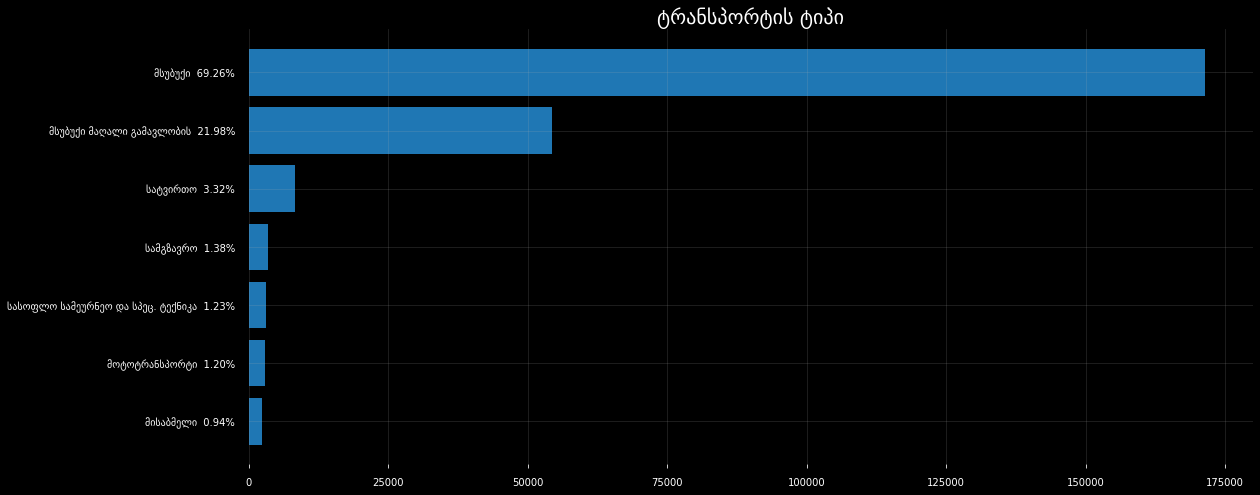

In [13]:
Type_of_vehicle = df["ტრანსპორტის ტიპი"]   # We get information on types of transport

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # count the number of times the variables are repeated

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # We use the function to collect the phrases to which we need to build a drawing


key_Phrases  # Phrases whose quantity we need to find



union = {}  # create a dictionary to save the final answers

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # get the information according to the required phrases

    Quantity = Quantity_of_Transport["რაოდენობა"]  # store quantitative information in the new variable

    Quantity = sum(Quantity)        # We count the actual number of specific phrases

    union[item] = Quantity      # add the actual number along with its corresponding phrase in the answers dictionary
    

Show_first(union , 7, False)  # With this function we calculate the total quantity, and choose how much information to display on the drawing

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,8), "ტრანსპორტის ტიპი")  # draw the drawing

Max is  65


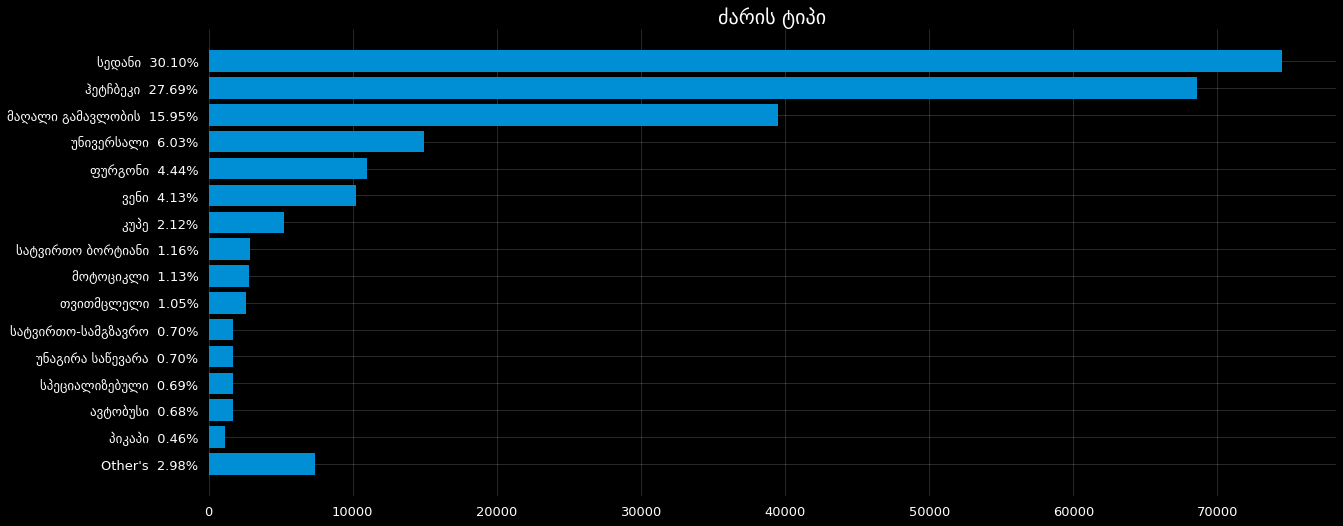

In [14]:
Type_of_vehicle = df["ძარის ტიპი"]   # get information about certain characteristics

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # count the number of times the variables are repeated

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # We use the function to collect the phrases to which we need to build a drawing


key_Phrases  # Phrases whose quantity we need to find



union = {}  # create a dictionary to save the final answers

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # get the information according to the required phrases

    Quantity = Quantity_of_Transport["რაოდენობა"]  # store quantitative information in the new variable

    Quantity = sum(Quantity)        # We count the actual number of specific phrases

    union[item] = Quantity      # add the actual number along with its corresponding phrase in the answers dictionary
    

Show_first(union , 15, True)  # With this function we calculate the total quantity, and choose how much information to display on the drawing

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,8), "ძარის ტიპი")  # draw the drawing

Max is  820


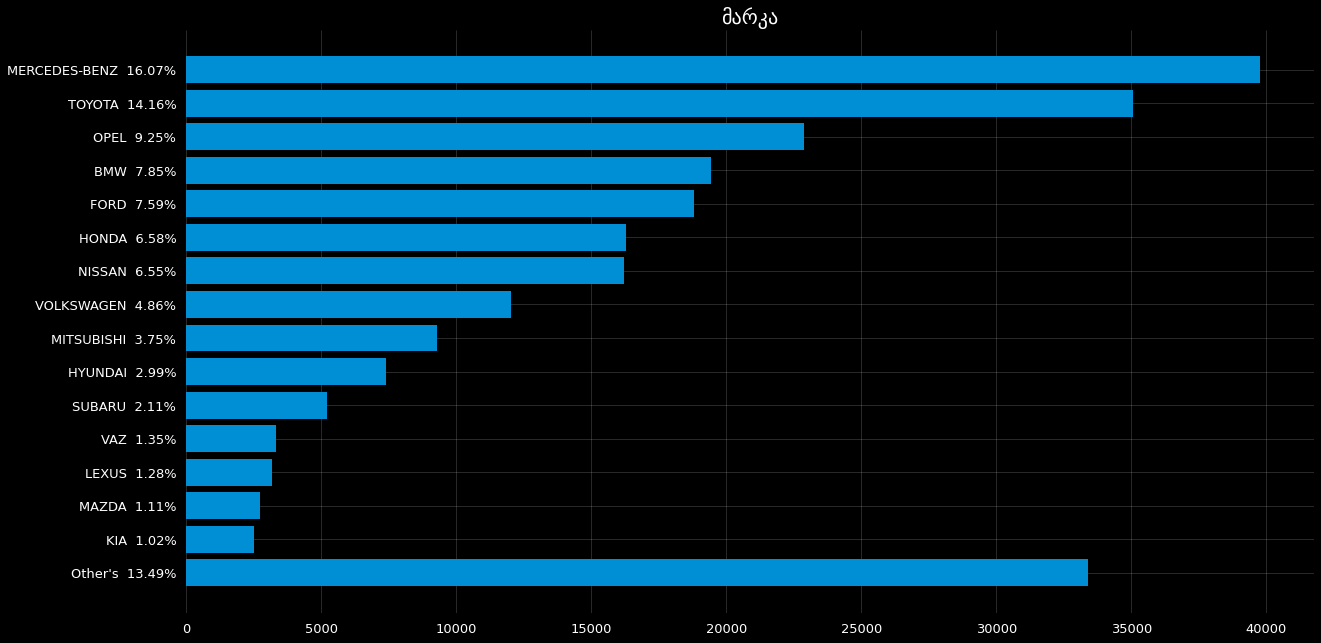

In [15]:
Type_of_vehicle = df["მარკა"]   # get information about certain characteristics

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # count the number of times the variables are repeated

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # We use the function to collect the phrases to which we need to build a drawing


key_Phrases  # Phrases whose quantity we need to find



union = {}  # create a dictionary to save the final answers

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # get the information according to the required phrases

    Quantity = Quantity_of_Transport["რაოდენობა"]  # store quantitative information in the new variable

    Quantity = sum(Quantity)        # We count the actual number of specific phrases

    union[item] = Quantity      # add the actual number along with its corresponding phrase in the answers dictionary
    

Show_first(union , 15, True)  # With this function we calculate the total quantity, and choose how much information to display on the drawing

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,10), "მარკა")  # draw the drawing

Max is  8652


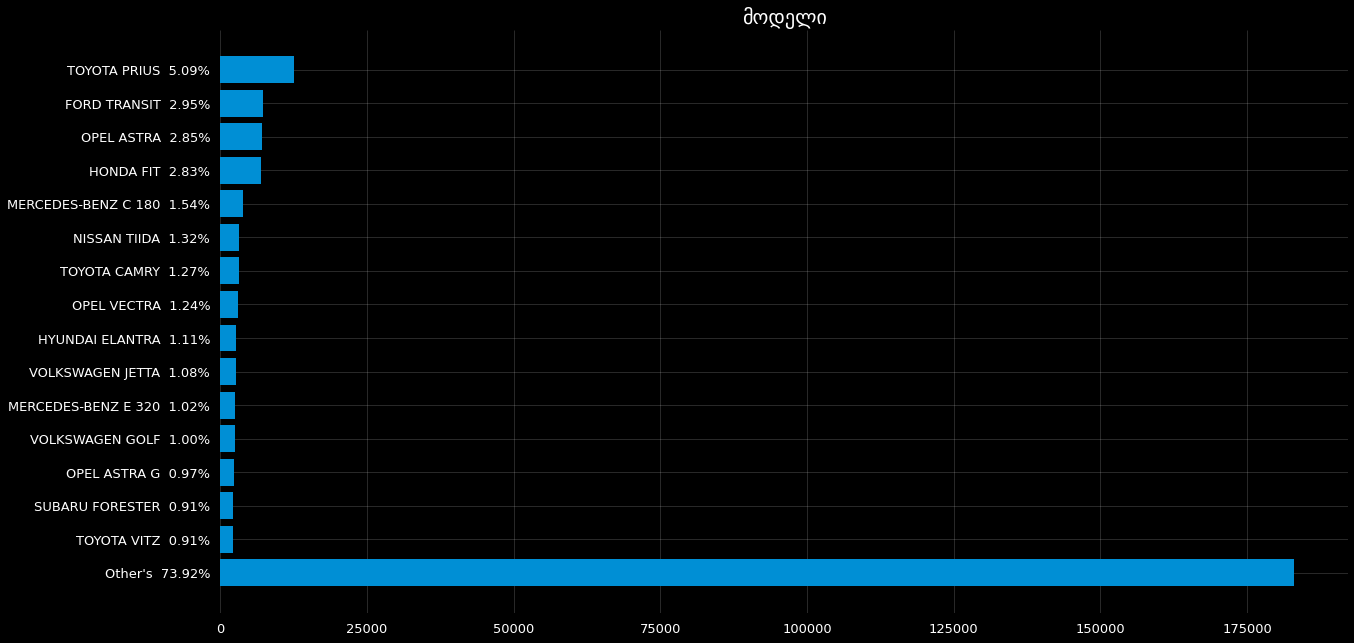

In [16]:
Type_of_vehicle = df["მოდელი"]   # get information about certain characteristics

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # count the number of times the variables are repeated

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # We use the function to collect the phrases to which we need to build a drawing


key_Phrases  # Phrases whose quantity we need to find



union = {}  # create a dictionary to save the final answers

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # get the information according to the required phrases

    Quantity = Quantity_of_Transport["რაოდენობა"]  # store quantitative information in the new variable

    Quantity = sum(Quantity)        # We count the actual number of specific phrases

    union[item] = Quantity      # add the actual number along with its corresponding phrase in the answers dictionary
    

Show_first(union , 15, True)  # With this function we calculate the total quantity, and choose how much information to display on the drawing

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,10), "მოდელი")  # draw the drawing


Max is  80


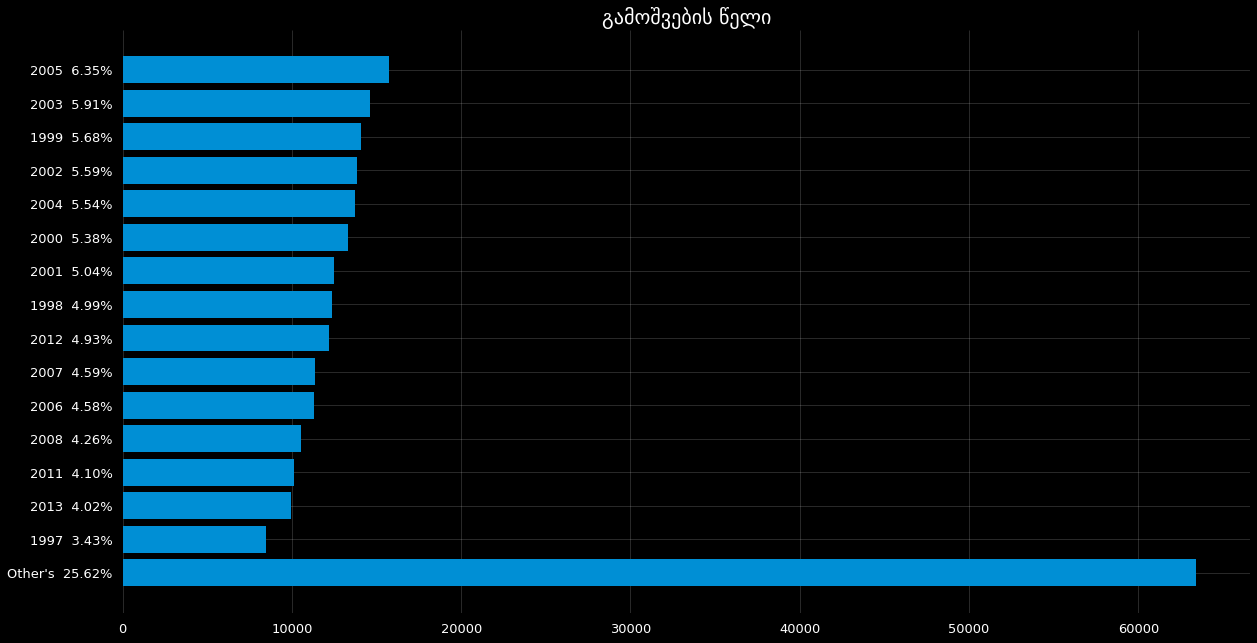

In [17]:
Type_of_vehicle = df["გამოშვების წელი"]   # get information about certain characteristics

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # count the number of times the variables are repeated

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # We use the function to collect the phrases to which we need to build a drawing


key_Phrases  # Phrases whose quantity we need to find



union = {}  # create a dictionary to save the final answers

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # get the information according to the required phrases

    Quantity = Quantity_of_Transport["რაოდენობა"]  # store quantitative information in the new variable

    Quantity = sum(Quantity)        # We count the actual number of specific phrases

    union[item] = Quantity      # add the actual number along with its corresponding phrase in the answers dictionary
    

Show_first(union , 15, True)  # With this function we calculate the total quantity, and choose how much information to display on the drawing

key_Phraseso = []    # We are creating a new list to save strings instead of ints so as not to error code

for i in key_Phrases:
    key_Phraseso.append(str(i))   # We store it in strings and put it in a list

Build_Barh_sizes_excel( key_Phraseso , Quantity, Total ,"fivethirtyeight", True , (18,10), "გამოშვების წელი")  # draw the drawing


Max is  11


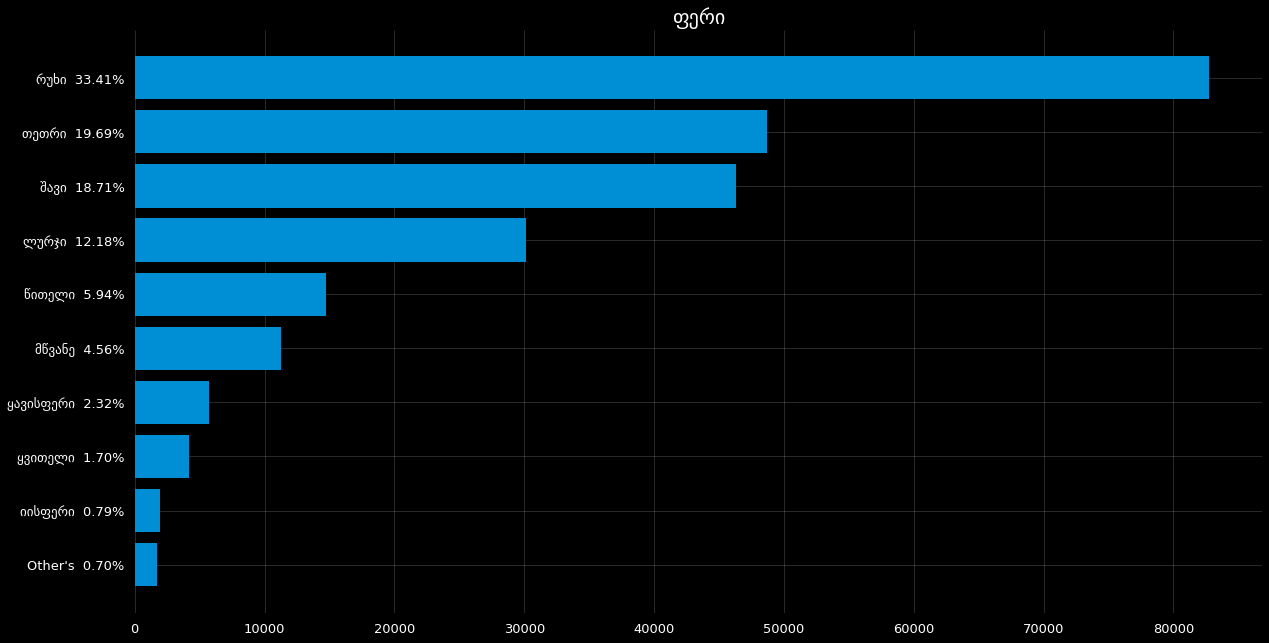

In [18]:
Type_of_vehicle = df["ფერი"]   # get information about certain characteristics

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # count the number of times the variables are repeated

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # We use the function to collect the phrases to which we need to build a drawing


key_Phrases  # Phrases whose quantity we need to find



union = {}  # create a dictionary to save the final answers

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # get the information according to the required phrases

    Quantity = Quantity_of_Transport["რაოდენობა"]  # store quantitative information in the new variable

    Quantity = sum(Quantity)        # We count the actual number of specific phrases

    union[item] = Quantity      # add the actual number along with its corresponding phrase in the answers dictionary
    

Show_first(union , 9, True)  # With this function we calculate the total quantity, and choose how much information to display on the drawing

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,10), "ფერი")  # draw the drawing


Max is  7


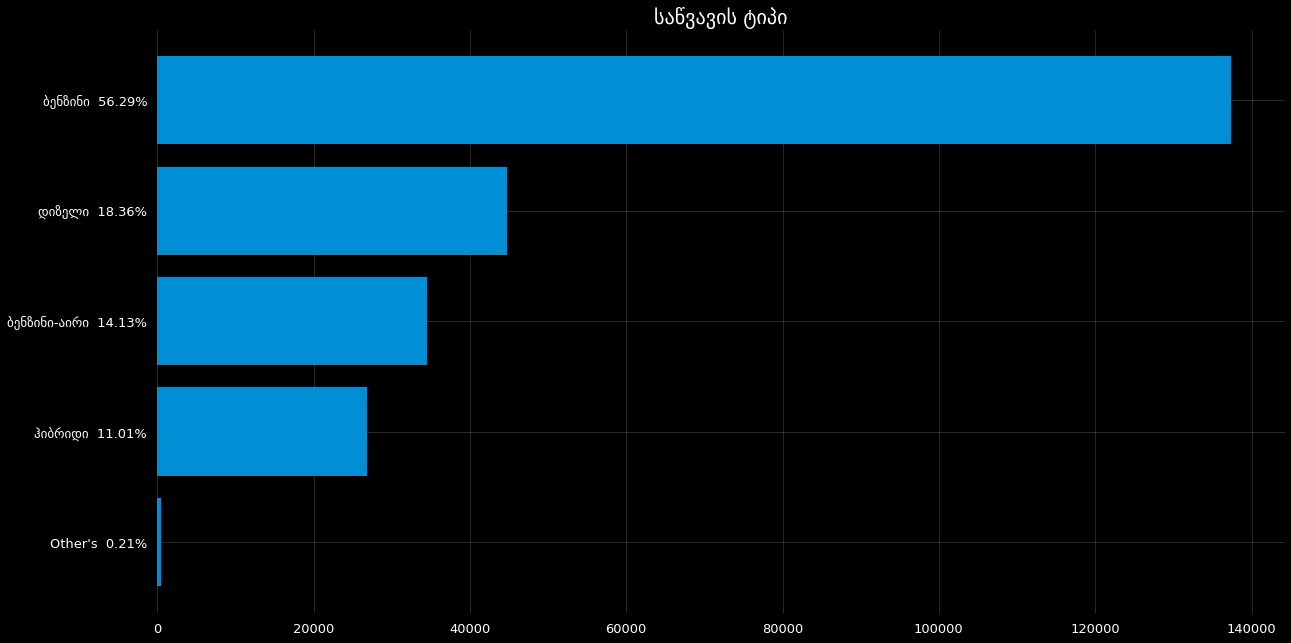

In [19]:
Type_of_vehicle = df["საწვავის ტიპი"]   # get information about certain characteristics

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # count the number of times the variables are repeated

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # We use the function to collect the phrases to which we need to build a drawing


key_Phrases  # Phrases whose quantity we need to find



union = {}  # create a dictionary to save the final answers

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # get the information according to the required phrases

    Quantity = Quantity_of_Transport["რაოდენობა"]  # store quantitative information in the new variable

    Quantity = sum(Quantity)        # We count the actual number of specific phrases

    union[item] = Quantity      # add the actual number along with its corresponding phrase in the answers dictionary
    

Show_first(union , 4, True)  # With this function we calculate the total quantity, and choose how much information to display on the drawing

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,10), "საწვავის ტიპი")  # draw the drawing


Max is  4408


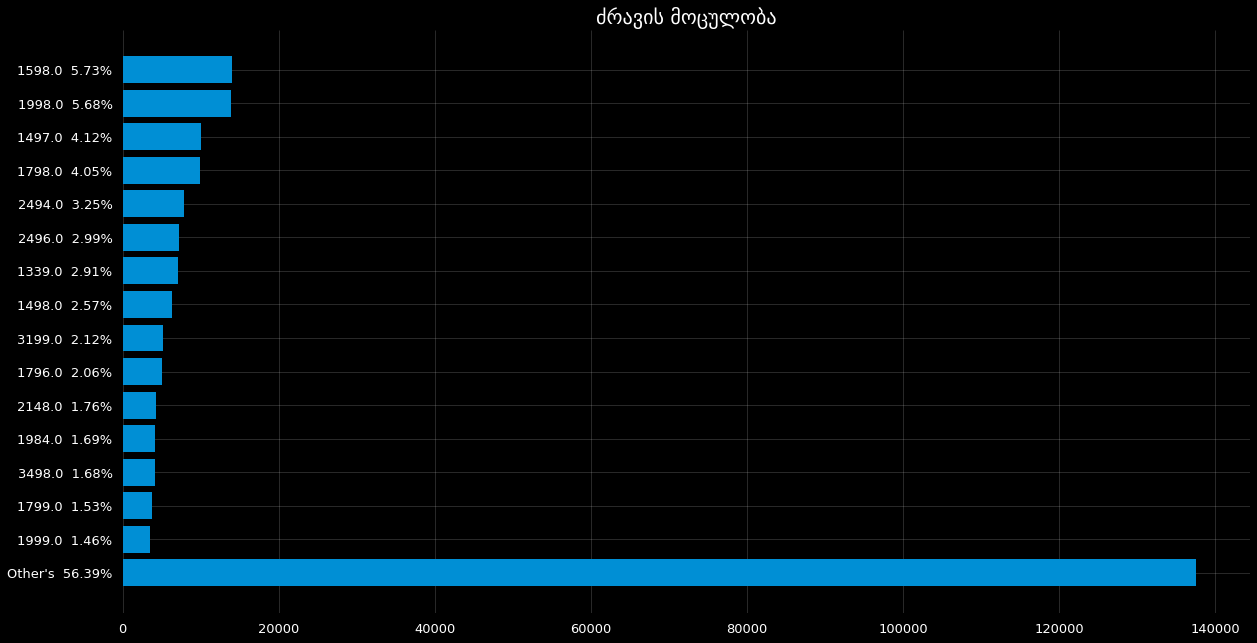

In [20]:
Type_of_vehicle = df["ძრავის მოცულობა"]   # get information about certain characteristics

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # count the number of times the variables are repeated

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # We use the function to collect the phrases to which we need to build a drawing


key_Phrases  # Phrases whose quantity we need to find



union = {}  # create a dictionary to save the final answers

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # get the information according to the required phrases

    Quantity = Quantity_of_Transport["რაოდენობა"]  # store quantitative information in the new variable

    Quantity = sum(Quantity)        # We count the actual number of specific phrases

    union[item] = Quantity      # add the actual number along with its corresponding phrase in the answers dictionary
    

Show_first(union , 15, True)  # With this function we calculate the total quantity, and choose how much information to display on the drawing

key_Phraseso = []    # We are creating a new list to save strings instead of ints so as not to error code

for i in key_Phrases:
    key_Phraseso.append(str(i))   # We store it in strings and put it in a list

Build_Barh_sizes_excel( key_Phraseso , Quantity, Total ,"fivethirtyeight", True , (18,10), "ძრავის მოცულობა")  # draw the drawing


Max is  2


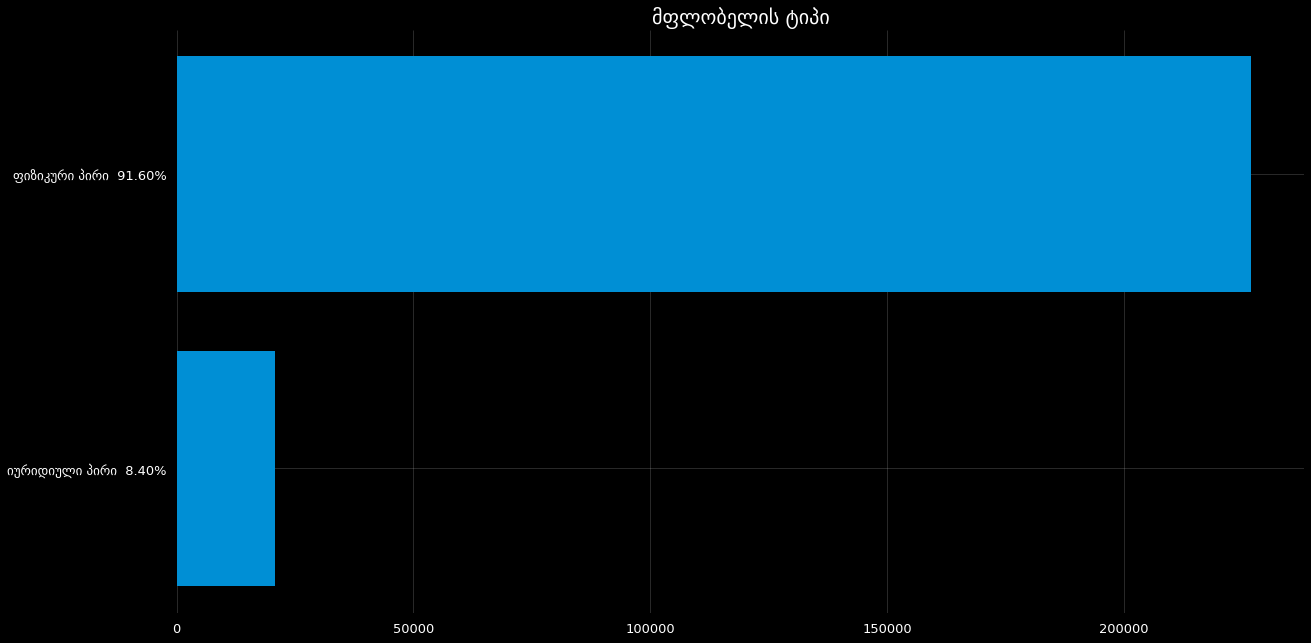

In [21]:
Type_of_vehicle = df["მფლობელის ტიპი"]   # get information about certain characteristics

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # count the number of times the variables are repeated

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # We use the function to collect the phrases to which we need to build a drawing


key_Phrases  # Phrases whose quantity we need to find



union = {}  # create a dictionary to save the final answers

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # get the information according to the required phrases

    Quantity = Quantity_of_Transport["რაოდენობა"]  # store quantitative information in the new variable

    Quantity = sum(Quantity)        # We count the actual number of specific phrases

    union[item] = Quantity      # add the actual number along with its corresponding phrase in the answers dictionary
    

Show_first(union , 2, False)  # With this function we calculate the total quantity, and choose how much information to display on the drawing

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,10), "მფლობელის ტიპი")  # draw the drawing
